In [1]:
import sys
sys.path.append('../../benchmarking')
from QASMBench.interface.qiskit import QASMBenchmark

path = '../../benchmarking/QASMBench'

category = 'medium'
# select only the circuits with the number of qubits in the list
num_qubits_list = list(range(3, 50))

# whether to remove the final measurement in the circuit
remove_final_measurements = True

# whether use qiskit.transpile() to transpile the circuits (note: must provide qiskit backend)
do_transpile = True

# arguments for qiskit.transpile(). backend should be provide at least
transpile_args = {'basis_gates' : ['u', 'cp']}

bm = QASMBenchmark(path, category, num_qubits_list=num_qubits_list, remove_final_measurements=remove_final_measurements, do_transpile=do_transpile, **transpile_args)

29


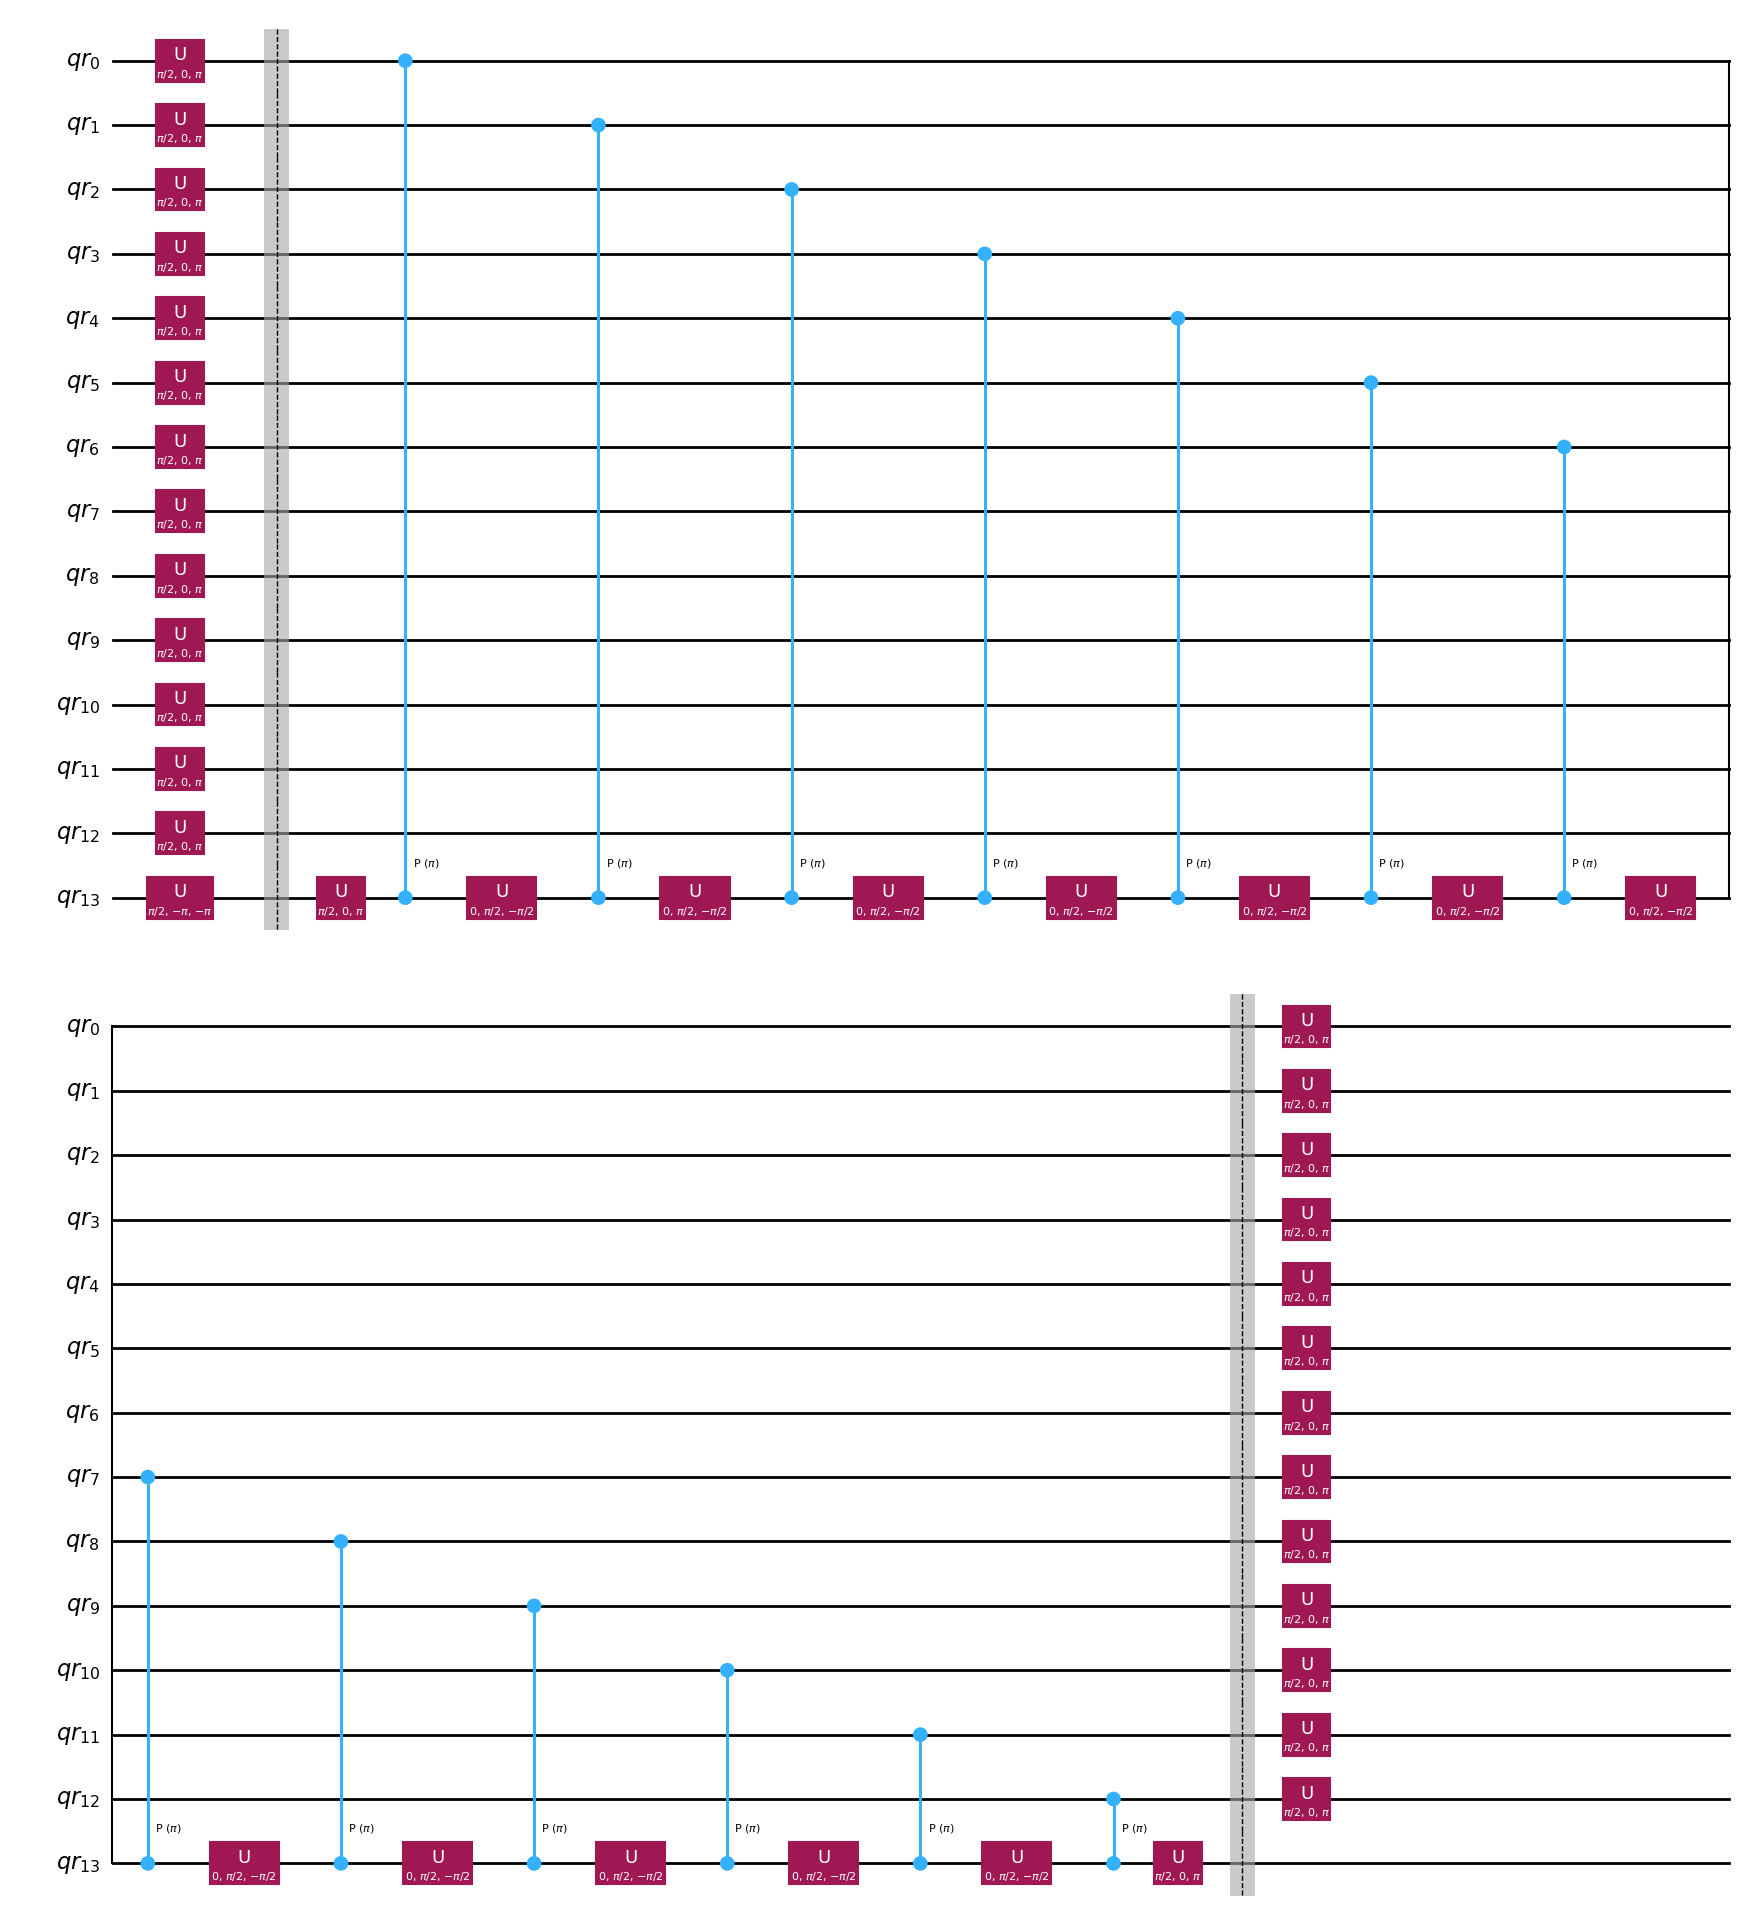

In [2]:
circuit = bm.get('bv_n14')
# from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# qreg = QuantumRegister(2, 'q')
# creg = ClassicalRegister(2, 'c')
# circuit = QuantumCircuit(qreg, creg)

# circuit.cx(qreg[0], qreg[1])

# circuit.measure(qreg[0], creg[0])
# circuit.x(qreg[1]).c_if(creg, 1)

print(circuit.depth())
circuit.draw(output='mpl')

29
28
[{'type': 'single-qubit', 'name': 'u', 'qargs': [0], 'qregs': ['qr'], 'params': [1.5707963267948966, 0.0, 3.141592653589793]}, {'type': 'single-qubit', 'name': 'u', 'qargs': [1], 'qregs': ['qr'], 'params': [1.5707963267948966, 0.0, 3.141592653589793]}, {'type': 'single-qubit', 'name': 'u', 'qargs': [2], 'qregs': ['qr'], 'params': [1.5707963267948966, 0.0, 3.141592653589793]}, {'type': 'single-qubit', 'name': 'u', 'qargs': [3], 'qregs': ['qr'], 'params': [1.5707963267948966, 0.0, 3.141592653589793]}, {'type': 'single-qubit', 'name': 'u', 'qargs': [4], 'qregs': ['qr'], 'params': [1.5707963267948966, 0.0, 3.141592653589793]}, {'type': 'single-qubit', 'name': 'u', 'qargs': [5], 'qregs': ['qr'], 'params': [1.5707963267948966, 0.0, 3.141592653589793]}, {'type': 'single-qubit', 'name': 'u', 'qargs': [6], 'qregs': ['qr'], 'params': [1.5707963267948966, 0.0, 3.141592653589793]}, {'type': 'single-qubit', 'name': 'u', 'qargs': [7], 'qregs': ['qr'], 'params': [1.5707963267948966, 0.0, 3.1415

<Axes: >

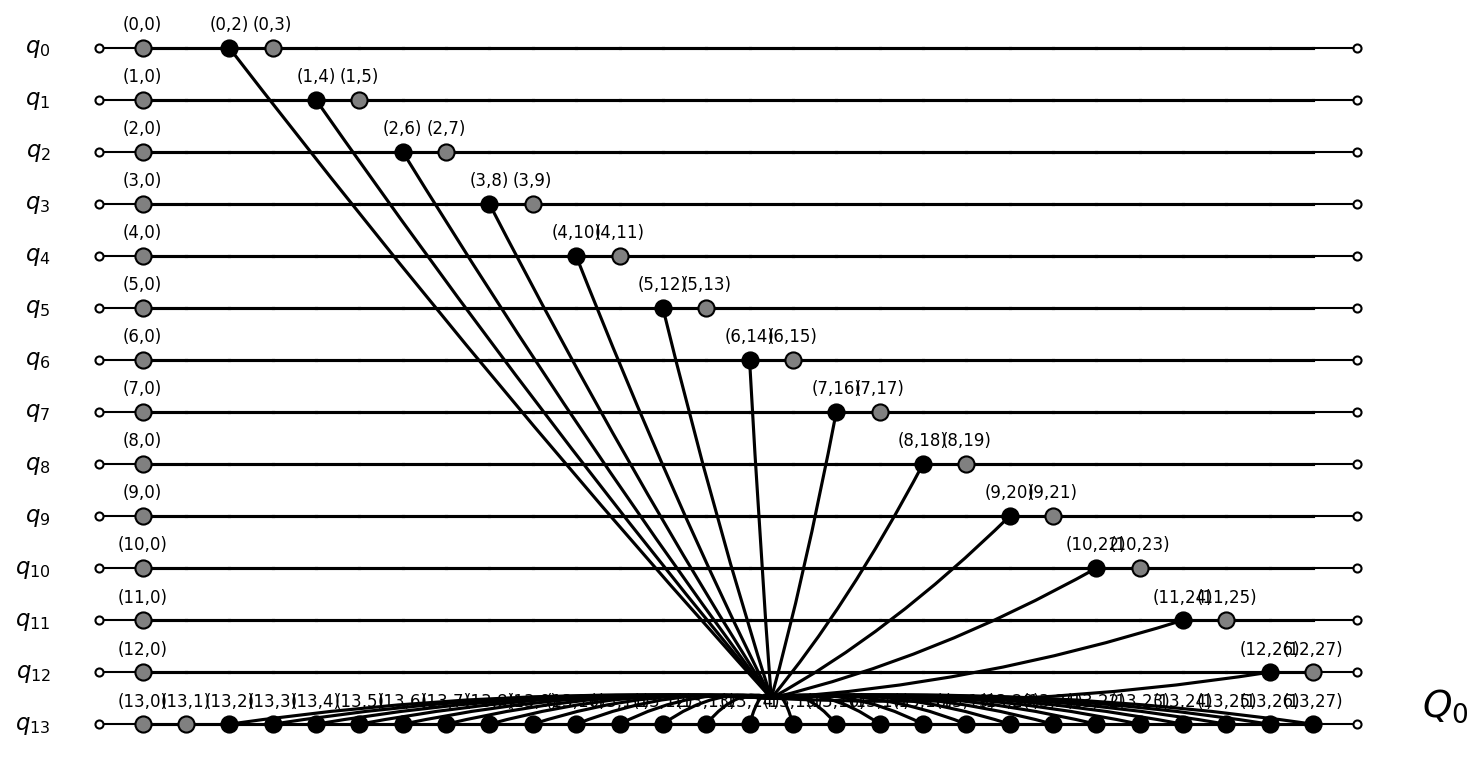

In [3]:
from disqco import QuantumCircuitHyperGraph
%load_ext jupyter_tikz

hypergraph = QuantumCircuitHyperGraph(circuit)

print(circuit.depth())
print(hypergraph.depth)

for i, layer in hypergraph.layers.items():
    print(layer, i)

hypergraph.draw(output='mpl')

In [4]:
from disqco import QuantumCircuitHyperGraph

hypergraph = QuantumCircuitHyperGraph(circuit)
print(hypergraph.depth)
# hypergraph.draw(output='tikz')

28


Initial depth: 28


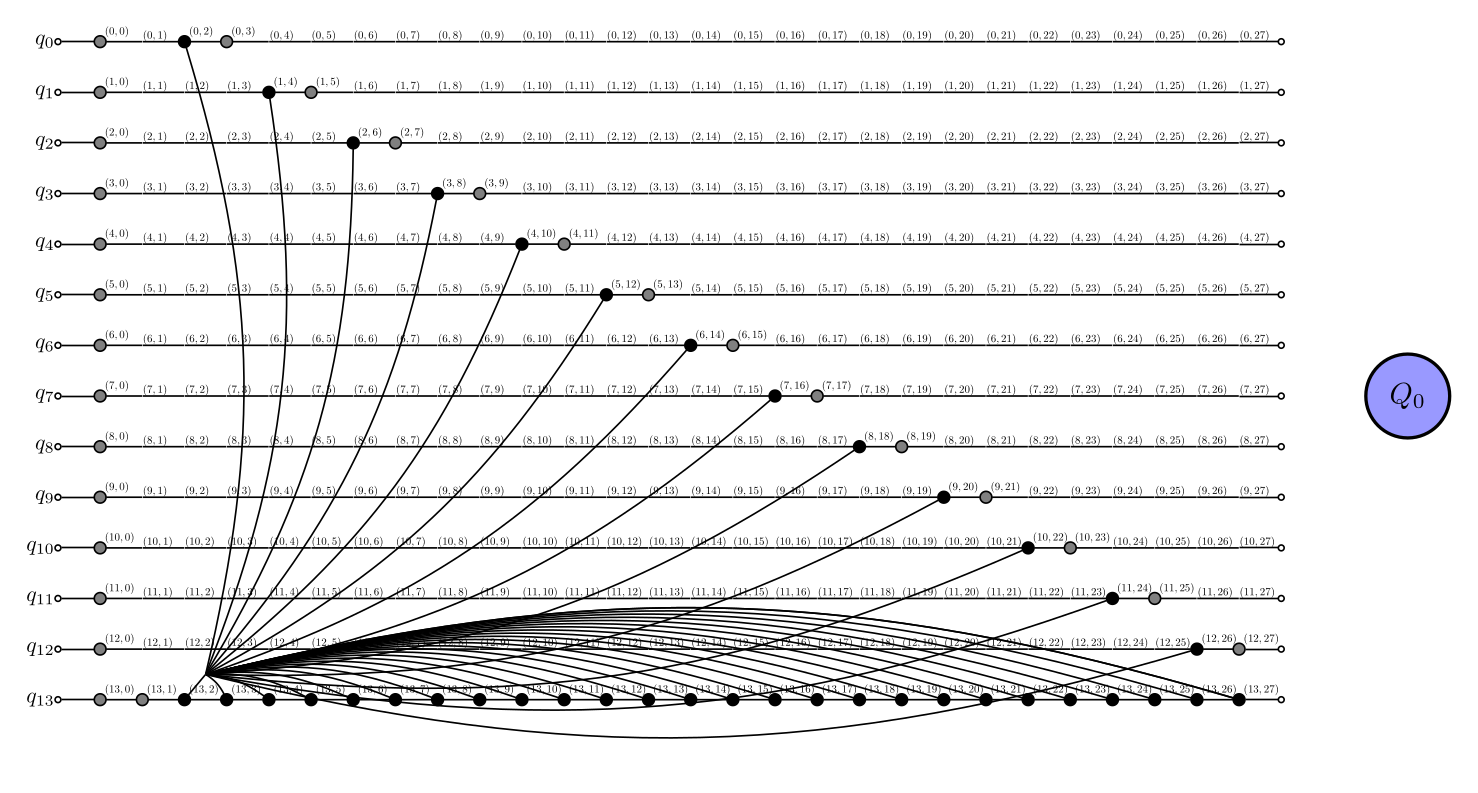

{0: {0}, 1: {1}, 2: {2}, 3: {3}, 4: {4}, 5: {5}, 6: {6}, 7: {7}, 8: {8}, 9: {9}, 10: {10}, 11: {11}, 12: {12}, 13: {13}, 14: {14}, 15: {15}, 16: {16}, 17: {17}, 18: {18}, 19: {19}, 20: {20}, 21: {21}, 22: {22}, 23: {23}, 24: {24}, 25: {25}, 26: {26}, 27: {27}}


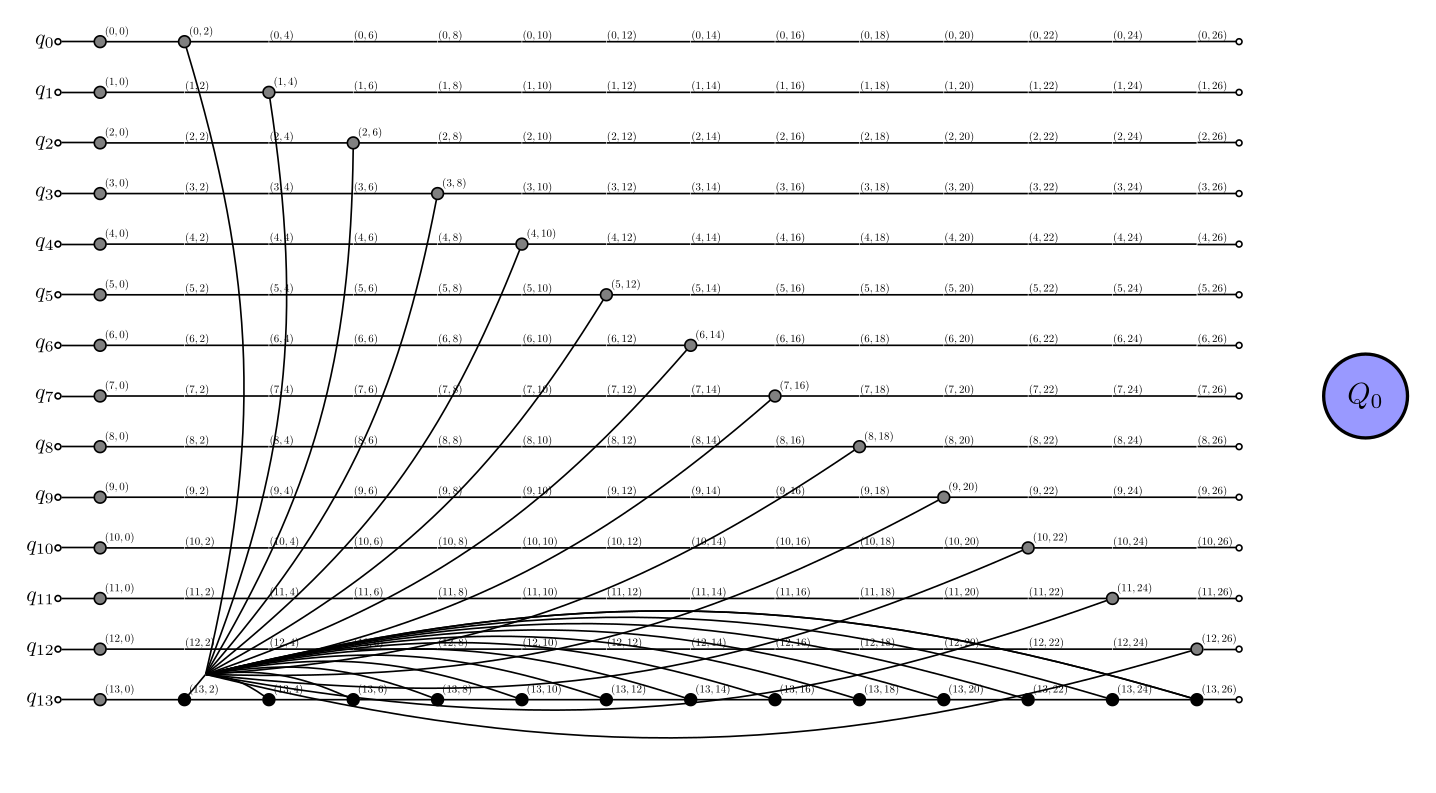

{0: {0, 1}, 2: {2, 3}, 4: {4, 5}, 6: {6, 7}, 8: {8, 9}, 10: {10, 11}, 12: {12, 13}, 14: {14, 15}, 16: {16, 17}, 18: {18, 19}, 20: {20, 21}, 22: {22, 23}, 24: {24, 25}, 26: {26, 27}}


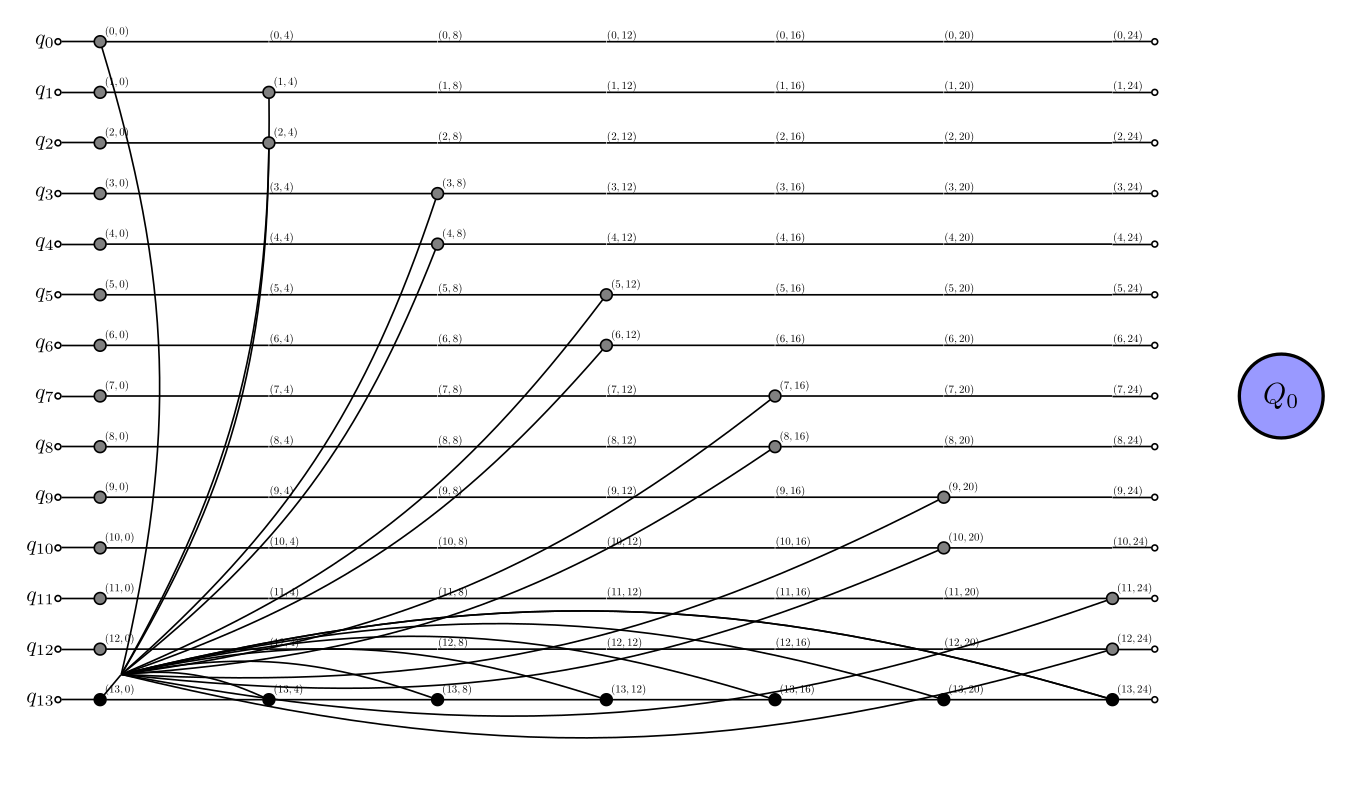

{0: {0, 1, 2, 3}, 4: {4, 5, 6, 7}, 8: {8, 9, 10, 11}, 12: {12, 13, 14, 15}, 16: {16, 17, 18, 19}, 20: {20, 21, 22, 23}, 24: {24, 25, 26, 27}}


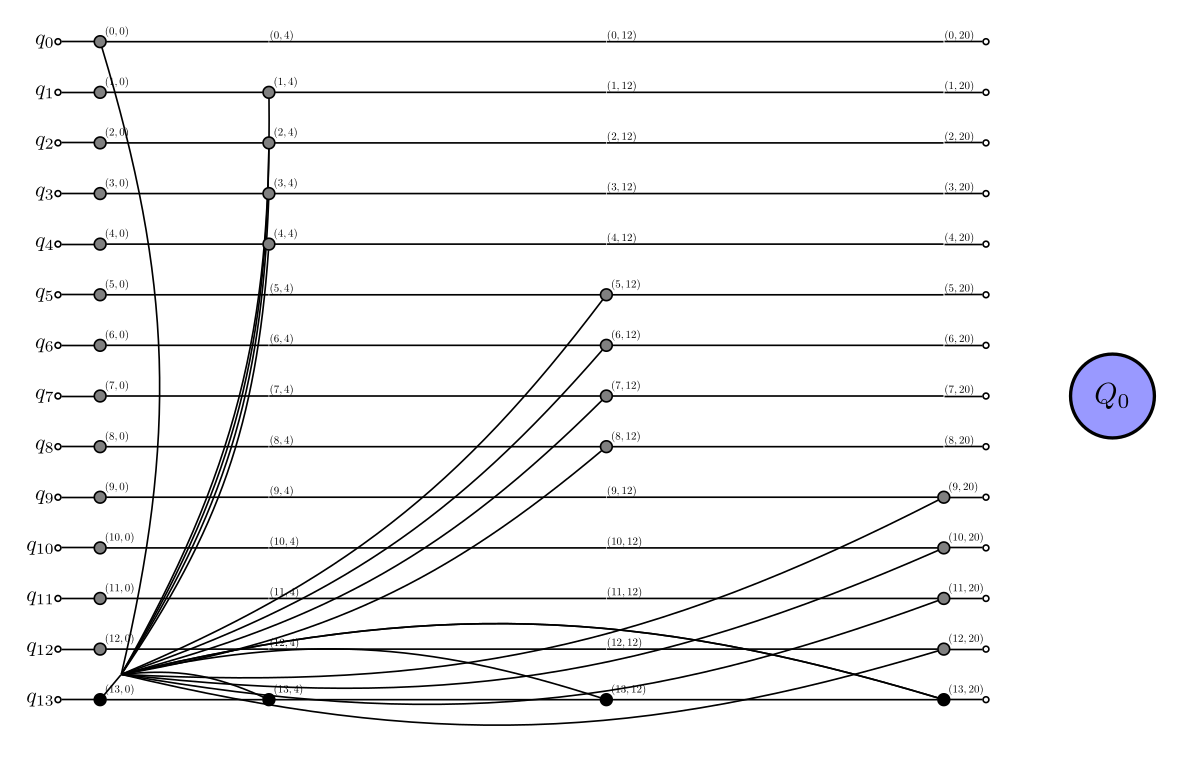

{0: {0, 1, 2, 3}, 4: {4, 5, 6, 7, 8, 9, 10, 11}, 12: {12, 13, 14, 15, 16, 17, 18, 19}, 20: {20, 21, 22, 23, 24, 25, 26, 27}}


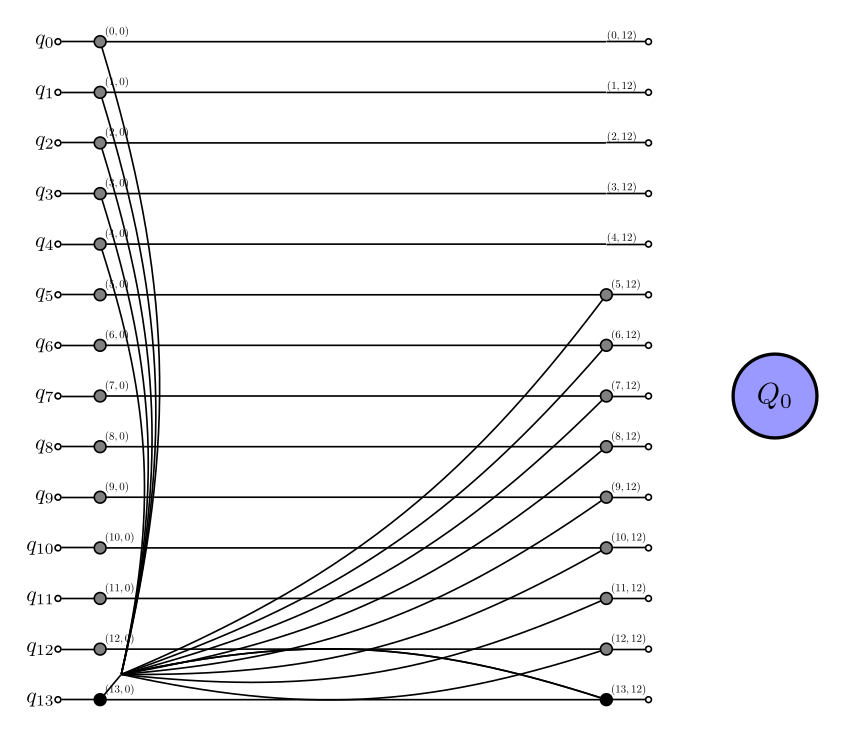

{0: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}, 12: {12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27}}


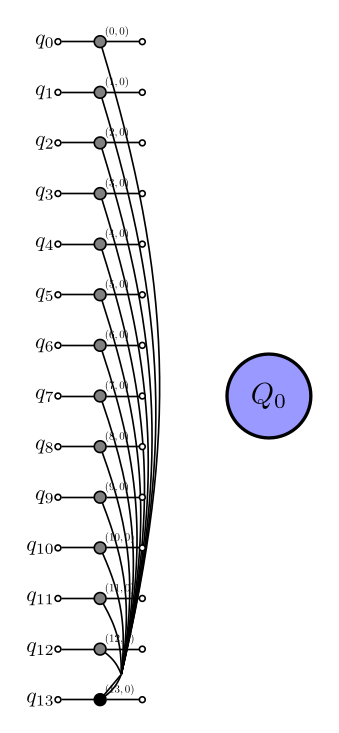

{0: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27}}


In [5]:
from disqco.graphs.coarsening.coarsener import HypergraphCoarsener

coarsener = HypergraphCoarsener()

graph_list, mapping_list = coarsener.coarsen_recursive_batches_mapped(hypergraph)

for g in graph_list:
    f = g.draw(output='tikz')
    display(f)
    print(mapping_list[graph_list.index(g)])

In [6]:
from disqco import QuantumNetwork
from disqco import FiducciaMattheyses

network = QuantumNetwork(qpu_sizes=[circuit.num_qubits //2 + 1]*2)
fm = FiducciaMattheyses(circuit, network)
# initial_partition = fm.set_initial_partition_assignment(method='random')

results = fm.multilevel_partition()

Initial depth: 28
